## Conceptos técnicos de las pruebas de hipótesis

El **error de tipo I** se conoce como "Falsos positivos" y se expresa con la letra alpha. Alpha, es el nivel de significancia del test y como estandar se suele tomar un valor de 0.05. Corresponde a rechazar incorrectamente la hipótesis nula. El **error de tipo II** se conoce como "Falsos negativos" y se expresa con la letra beta. El complemento de beta (1-beta) se conoco como el poder del test. Beta suele tomar el valor de 0.2

¿Por qué esta diferencia? En términos intuitivos es como nosotros decidimos castigar el modelo que estamos implementando. Por ejemplo, si estamos pensando en un modelo de score y queremos evaluar la probabilidad de que un individuo no defaulte (Ho) vs que defaultee (Ha), el "falso positivo" (alpha) corresponderá a un cliente que defaulteo en la realidad pero yo digo que no defaulteo (HO verdadero) y lo califico como bueno. **Esto rechazando incorrectamente la hipótesis nula**. En cambio, el falso negativo (beta) corresponderá a un cliente que NO defaulteo en la realidad pero yo digo que defaulteo (HO falso) y lo califico como malo.

Siguiendo esta lógica, el alpha suele ser más restrictivo producto del daño que puede generar. Yo le estaría dando un crédito a un cliente que tiene altas chances incumplir. En el caso del beta, tenemos más bien un costo de oportunidad al no darle un crédito a un posible buen pagador. Por este motivo, "1-beta" se conoce como el poder del test dado que implican todos los créditos que otorgo a buenos pagadores.

**¿Qué es el p-value?** La probabilidad de caer en un error de tipo I

**Distribuciones con dos colas** Tenemos que tener en cuenta que para distribuciones con dos colas, el alpha de 0.05 en realidad es de 0.025 para cada una de las colas


#### Estadísticos:

Cuando tenemos un estadístico, por ejemplo el de jarque-bera o el de un t-test, lo que estamos haciendo es encontrando una forma funcional de una variable aleatoria para expresar lo que queremos contrastar. Capaz en un t-test es más claro pero en el de jarque-bera es igual...Estamos creando una variable aleatoria que nos hable de la curtosis de una distribución para luego compararla con el valor de una distribución normal.

Esa nueva variable aleatoria (el estadístico) tiene una distribución implicita que podemos buscar en su Función de distribución acumulada y calcular la probabilidad de que tome cierto valor. **Eso es un test de hipótesis**


## One sample Z-test

Este test de hipótesis sirve para comprar una media muestral con una media poblacional hipotetica siempre y cuando conozcamos el desvío estandar poblacional. Otra hipotesis fundamental de esto es que la muestra tiene que se recolectada al azar, sus datos tienen que ser independientes unos de otros y se tienen que distribuir normalmente (por esto se llama Z-test).

El supuesto de normalidad se da por cumplido por el teorema central del límite cuando tomamos grandes muestras de datos. Además, sabemos que, por el mismo teorema, el desvío estandar muestral (lo podemos obtener de los datos de la muestra) converge al desvío estandar poblacional con lo cual se puede dar como cumplidas ambas hipótesis.
También vale la pena recordar que la ley de los grandes números nos garantiza la convergencia de la media muestral a una poblacional y que el teorema central del límite nos habal de la velocidad de convergencia y la forma (como una distribución normal).

#### ¿Siempre tenemos que tener el desvío estandar poblacional?

La respuesta es **No** dado que sabemos por el teorema central del límite que si la muestra es lo suficientemente grande el desvío estandar muestral va a converger a un desvío estandar poblacional.

#### ¿Que tipo de problemas podemos resolver con este estadístico?

Marketing: Si las ventas históricas (**poblacionales**) tienen una media de 140 y un desvío estandar de 25; y en una nueva campaña que duro 30 días (**sample size**) tuvimos un promedio de 155 (**muestral**) ¿Cómo podemos saber si la nueva campaña verdaderamente ayudo a las ventas?

Enseñanza: Si sabemos que el desvío estandar poblacional de los scores de un examen es 8.5 y el instituto quiere recibir puntajes superiores a 210 (**poblacionales**). Si este año el promedio de puntaje fue de 212.79 (**muestral**) de 42 aspirantes (**sample size**) ¿Es este resultado representativo con un nivel de confianza del 95%?

**1 cola o 2 colas:** En general cuando solo queremos ver una diferencia tenemos un problema de dos colas (no nos interesa si positiva o negativa) pero si queremos saber si un valor es mayor o menor a algo tenemos un problema de 1 cola. Esto nos va a servir para determina la hipótesis alternativa. **La hipótesis nula en estos test es siempre la igualdad de medias**

**P-value y nivel de confianza:** En estos casos siempre nuestra hipótesis nula es que ambas medias son iguales. Con lo cual, con un margen de error del 5% obtenemos un nivel de confianza del 95%. Por ende, si el p-value del test es menor al 5% podemos rechazar la hipótesis nula y concluir en la hipótesis alternativa. Si el p-value es mayor al 5% no podemos rechazar la hipótesis nula porque no estaríamos en la región de confianza del 95% sino en una menor.

Decir que el p-value es menor al 5% quiere decir que en realidad cayó sobre la región de rechazo ¿Qué quiere decir esto? Que la probabilidad de que ambas medias muestrales sean igual es más pequeña que la tolerancia que nosotros estamos marcando. Como esa probabilidad es muy chica podemos rechazar la hipótesis nula e ir por la hipótesis alternativa.

Estadístico:

$$
{\displaystyle Z={\frac {({\bar {X}}-\mu _{0})}{s}},    s^{2}={\frac {\sigma ^{2}}{n}}}
$$


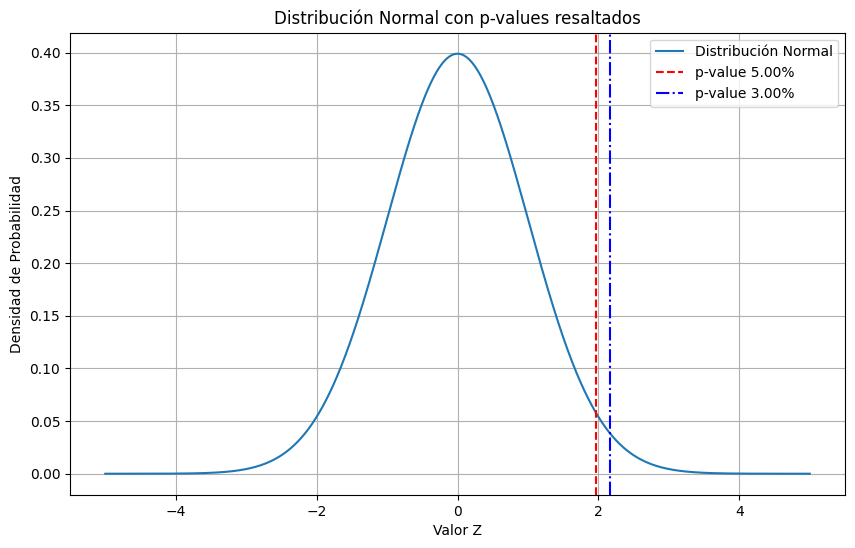

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

# Generar datos para la distribución normal
mu = 0
sigma = 1
x = np.linspace(-5, 5, 1000)
y = st.norm.pdf(x, mu, sigma)

# Crear el gráfico de la distribución normal
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribución Normal')

# Resaltar los p-valores del 5% y 3%
p_values = [0.05, 0.03]
colors = ['red', 'blue']
linestyles = ['--', '-.']

for p, color, linestyle in zip(p_values, colors, linestyles):
    z_value = st.norm.ppf(1 - p / 2)  # Calcular el valor z correspondiente al p-valor
    plt.axvline(z_value, color=color, linestyle=linestyle, label=f'p-value {p:.2%}')

# Añadir leyenda y etiquetas
plt.legend()
plt.xlabel('Valor Z')
plt.ylabel('Densidad de Probabilidad')
plt.title('Distribución Normal con p-values resaltados')
plt.grid(True)

# Mostrar el gráfico
plt.show()


#### Ejemplo one-sample Z-test (Two tails)

Una compañia desea saber si debído a los últimos recortes de gastos que hicieron, si las quejas de sus clientes cambiaron notoriamente desde la implementación de los recortes. La data histórica muestra que el promedio de quejas en el mes es de 100 con un desvío estandar de 20. Recolectaron información en los últimos 36 días con una media de 105 quejas.

**Ho: media = &mu;** \
**Ha: media != &mu;**

In [2]:
# Calculamos el estadístico
z = (105-100)/(20/(36)**(1/2))
z

1.5

In [3]:
# Ahora calculamos el valor del estadístico para un nivel de confianza del 5%
alpha = 0.05

# Dividimos por 2 porque es un estadístico de 2 colas y lo hacemo con un menos 1 para que nos quede la cola positiva
Z_critico = st.norm.ppf(1-alpha/2)
Z_critico

1.959963984540054

In [4]:
# Ahora lo que hacemos es calcular el p-value de ambas pruebas
# como la cdf nos da el área abajo de la curva.. Nosotros queremos saber que es lo que estamos dejando de lado..
p_value = 1 - st.norm.cdf(z)
p_value_critico = 1 - st.norm.cdf(Z_critico)

# Imprimimos el resultado
print(f"El resultado de la prueba nos da que el p-value es de {p_value.round(3)} vs un p-value crítico de {p_value_critico.round(3)}")
print("\n")
# nota al resultado
print("Nota: En este caso el p-value es de 2.5% por ser de dos colas pero el error total es de 5%")

El resultado de la prueba nos da que el p-value es de 0.067 vs un p-value crítico de 0.025


Nota: En este caso el p-value es de 2.5% por ser de dos colas pero el error total es de 5%


## One sample T-test

Es un estadístico que nos va a servir para comparar medias muestrales con medias poblaciones (o valores de referencia) siempre y cuando la población estudiada siga una distribución normal.

Este estadístico se utilizará por sobre todas las cosas cuando el tamaño muestral sea demasiado pequeño como para que el estadístico en el que está basada la inferencia esté normalmente distribuido, utilizándose una estimación de la desviación típica en lugar del valor real. En el caso que el tamaño muestral sea lo suficientemente grande vamos a preferir realizar un Z-test

$$
{\displaystyle t={\frac {{\overline {x}}-\mu _{0}}{s/{\sqrt {n}}}},}
$$

#### Ejemplo one-sample T-test

Una compañia de entrega de comidas dice que el promedio de entrega de sus pedidos es menor a 45 minutos. Sin embargo, un cliente es esceptico sobre esta premisa y realiza un conjunto de 25 muestras aleatorias para poder testear con un nivel de confianza del 3% si la presunción de la empresa es verídica.

**Ho: tiempo <= 45 minutos** \
**Ha: tiempo > 45 minutos**

In [5]:
# Si tuviesemos los datos de la muestra del cliente podríamos calcularlos con np.mean y np.std
sample_mean = 50.88
sample_std = 11.41

# Datos para los grados de libertad
sample = 25

t_statistic = (sample_mean - 45) / (sample_std / np.sqrt(25))
t_statistic

2.5766871165644183

In [6]:
# Calculamos el p-value
p_value = 1 - st.t.cdf(t_statistic, df=sample-1)
p_value

# Imprimimos el resultado
print(f"El resultado de la prueba nos da que el p-value es de {p_value.round(3)} vs un p-value crítico de 0.03")
print("\n")
print("Como el p-value es menor al nivel de confianza podemos rechazar la hipótesis nula")

El resultado de la prueba nos da que el p-value es de 0.008 vs un p-value crítico de 0.03


Como el p-value es menor al nivel de confianza podemos rechazar la hipótesis nula


## Two sample T-test (para varianzas iguales y distintas)

Es un estadístico que nos permite comparar dos medias muestrales independientes para determinar si hay una diferencia significativa entre ellas. Las condiciones que se tienen que incluir es que ambos muestros sean aleatorios y que haya independencia entre grupos y dentro de los grupos (entre cada valor de las muestras). Las poblaciones que se comparan tienen que distribuirse de forma normal. A pesar de que la condición de normalidad recae sobre las poblaciones, normalmente no se dispone de información sobre ellas, por lo que las muestras (dado que son reflejo de la población) tienen que distribuirse de forma aproximadamente normal. En caso de cierta asimetría los t-test son considerablemente robustos cuando el tamaño de las muestras es igual o mayor a 30.

La varianza de ambas poblaciones comparadas debe de ser igual. Tal como ocurre con la condición de normalidad, si no se dispone de información de las poblaciones, esta condición se ha de asumir a partir de las muestras. En caso de no cumplirse esta condición, se puede emplear la corrección de Welch.

Muchas veces se van a encontrar formulas para tamaños muestrales distintos e iguales. Este el caso donde los tamaños muestrales son los mismos (generalización) cuando son iguales llegamos a la otra formula.

$$
{\displaystyle t={\frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{S_{X_{1}X_{2}}\cdot {\sqrt {{\frac {1}{n_{1}}}+{\frac {1}{n_{2}}}}}}}}
$$

$$
{\displaystyle S_{X_{1}X_{2}}={\sqrt {\frac {(n_{1}-1)S_{X_{1}}^{2}+(n_{2}-1)S_{X_{2}}^{2}}{n_{1}+n_{2}-2}}}.}
$$

En este caso, los grados de libertad van a ser 2 dado que para poder comparar las medias con su media poblacional solo puedo tener n-1 grados de libertad porque el último valor es el que me tiene que cumplir la condición.

Como a varianza de ambas poblaciones comparadas debe de ser igual y puede no ocurir debemos analizar las varianzas muestrales si las muestras son los suficientemente grande. En el caso que las varianzas de ambas muestras sea distinta, lo que podemos hacer es ajustar el estadístico en función de las correciones de Welch. De esa forma, cambiarian los grados de libertad del estadístico para que metamos más restricciones. Esta no deja de ser el caso más generalizado de todos los two sample t-test. Miremos lo que si se tiene que cumplir es la independencia entre muestros para poder sumar varianzas:

$$
{\displaystyle t={{\overline {X}}_{1}-{\overline {X}}_{2} \over s_{{\overline {X}}_{1}-{\overline {X}}_{2}}}}
$$

$$
{\displaystyle s_{{\overline {X}}_{1}-{\overline {X}}_{2}}={\sqrt {{s_{1}^{2} \over n_{1}}+{s_{2}^{2} \over n_{2}}}}}
$$

$$
{\displaystyle \mathrm {g.l.} ={\frac {(s_{1}^{2}/n_{1}+s_{2}^{2}/n_{2})^{2}}{(s_{1}^{2}/n_{1})^{2}/(n_{1}-1)+(s_{2}^{2}/n_{2})^{2}/(n_{2}-1)}}.}
$$

#### Ejemplo two-sample T-test

Queremos comparar la velocidad de internet de dos proveedores (A y B). Para esto se hizo una recolección de datos muestrales de ambos grupos con las mediciones de la velocidad de internet. Comprueba que la velocidad promedio de mabas muestras es diferente con un 95% de confianza

**Ho: A.mean() = B.mean()** \
**Ha: A.mean() != B.mean()**

In [7]:
import pandas as pd
import pingouin as pg

# Definir el tamaño de las muestras
tamano_muestra1 = 15
tamano_muestra2 = 20

# Generar la primera muestra con valores entre 20 y 25
#muestra1 = np.random.uniform(20, 25, size=tamano_muestra1)

# Generar la segunda muestra con valores entre 23 y 27
#muestra2 = np.random.uniform(20, 25, size=tamano_muestra2)

# Definir las medias y desviaciones estándar deseadas
media_muestra1 = 22.02
desvio_std_muestra1 = 1.68
media_muestra2 = 25.77
desvio_std_muestra2 = 1.5

# Generar las muestras con las medias y desviaciones estándar especificadas
muestra1 = np.random.normal(media_muestra1, desvio_std_muestra1, size=tamano_muestra1)
muestra2 = np.random.normal(media_muestra2, desvio_std_muestra2, size=tamano_muestra2)

print(muestra1)
print("\n")
print(muestra2)

[22.20028578 19.66890692 23.44561011 25.42361223 20.61708743 24.3520881
 22.15097881 20.42245285 23.44373989 19.13810351 21.38849559 22.70987199
 22.93975526 22.50768719 20.04729351]


[23.85231395 26.14090106 24.75124206 25.83563522 25.74579583 26.92272741
 25.85813914 23.70516958 27.61453103 23.93909012 25.73956682 28.15542184
 26.34963853 24.9011825  26.2931386  26.67389924 27.34814901 26.52098212
 27.00399882 25.08409406]


In [8]:
# Calculamos algunos estadísticos asumiendo que ambas varianzas poblaciones son iguales
# Tengamos en cuenta que acá tenemos que ajustar los grados de libertad del desvío estandar porque es muestral!
mean1 = np.mean(muestra1)
std1 = np.std(muestra1, ddof=1)

mean2 = np.mean(muestra2)
std2 = np.std(muestra2, ddof=1)

# Imprimimos todo para ver los resultados
print(mean1)
print(std1)
print(mean2)
print(std2)

22.030397943811277
1.7994843389535822
25.92178084754827
1.2496766808957847


In [9]:
# Podemos calcular el estadístico manualmente
SE = np.sqrt(((tamano_muestra1-1)*(std1**2)+(tamano_muestra2-1)*(std2**2))/ (tamano_muestra1+tamano_muestra2-2))
t_stat = (mean1 - mean2)/(SE * np.sqrt((1/tamano_muestra1)+(1/tamano_muestra2)))

# Imprimimos el resultado
print(t_stat)

# Calculamos el p-value. Esto lo hacemos así dado que estamos en una muestra de dos colas.
# tomamos el valor absoluto del estadístico dado que no nos importa si es para arriba o para abajo
p_value = 2 * (1 - st.t.cdf(np.abs(t_stat), df=(tamano_muestra1+tamano_muestra2-2)))
print(p_value)

# Conclusion
print("En este caso el p-value es mayor al alpha de 5% y por ende no podemos rechzar la hipótesis nula")

-7.556820029655512
1.0804368510974882e-08
En este caso el p-value es mayor al alpha de 5% y por ende no podemos rechzar la hipótesis nula


In [10]:
# Otra forma de hacer lo mismo es con:
pg.ttest(x=muestra1, y=muestra2, alternative='two-sided', correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-7.55682,33,two-sided,1.080437e-08,"[-4.94, -2.84]",2.581145,7.549e+05,1.0


In [11]:
# Con la librería scipy
st.ttest_ind(muestra1, muestra2, alternative='two-sided', nan_policy='omit')

TtestResult(statistic=-7.55682002965551, pvalue=1.0804368504981808e-08, df=33.0)

## Two sample paired T-test (Muestras dependientes)

Dos muestras estan apareadas cuando las observacaciones de cada una de las muestres son dependientes entre ellas, es decir, que existe una relación entre ambas muestras. Un ejemplo típico de prueba t para mediciones repetitivas sería por ejemplo que los sujetos sean evaluados antes y después de un tratamiento.  

Los test dependientes o pareados tienen la ventaja frente a los independientes de que se puede controlar mejor la variación no sistemática (la producida por variables no contempladas en el estudio) ya que se bloquean al estar examinado los mismos individuos dos veces, no dos grupos de individuos distintos.

Los supuestos que tenemos que tener en cuenta es la independencia entre las observaciones dentro de cada muestra, la normalidad de la poblaciones y el tamaño muestral de ambas poblaciones tienen que ser iguales (tiene sentido dado que generalmente estamos analizando dos muestras en periodos distintos).

$$
{\displaystyle t={\frac {{\overline {d}}-\mu _{0}}{s_{D}/{\sqrt {n}}}}.}
$$

En este caso, generalmente nuestro mu es igual a 0 dado que nuestra hipotesis nula es que no hay diferencias. Pero en caso que querramos chequear otra diferencia tenemos que colocar otro valor y se corrige facilmente.

$$
{\displaystyle {\overline {d}}={\overline {x}}_{1}-{\overline {x}}_{2}}
$$

#### Ejemplo 1 paired T-test

Una empresa que cuenta con su aplicación movil constantemente realiza modificaciones en su aplicación para mejorar el engagement de los usuarios como también la experiencia en el uso de la aplicación. En este caso queremos estudiar el impacto de un update en la aplicación a través del tiempo promedio que pasa el usuario en la aplicación.

En este caso, la muestra que tenemos que seleccionar tiene que ser aleatoria.


**Ho: d_antes.mean() = d_despues.mean()** \
**Ha: d_antes.mean() != d_despues.mean()**

In [12]:
import pandas as pd
import pingouin as pg

# Definir el tamaño de las muestras
tamano_muestra1 = 20
tamano_muestra2 = 20

# Generar la primera muestra con valores entre 20 y 25
#muestra1 = np.random.uniform(20, 25, size=tamano_muestra1)

# Generar la segunda muestra con valores entre 23 y 27
#muestra2 = np.random.uniform(20, 25, size=tamano_muestra2)

# Definir las medias y desviaciones estándar deseadas
media_muestra1 = 10.25
desvio_std_muestra1 = np.sqrt(5.98)
media_muestra2 = 15.15
desvio_std_muestra2 = np.sqrt(9.6)

# Generar las muestras con las medias y desviaciones estándar especificadas
muestra1 = np.random.normal(media_muestra1, desvio_std_muestra1, size=tamano_muestra1)
muestra2 = np.random.normal(media_muestra2, desvio_std_muestra2, size=tamano_muestra2)

print(muestra1)
print("\n")
print(muestra2)

[ 8.55534368 10.55208745  4.70706045  8.01391627  9.1985873  10.29701005
 10.93100305  9.32667055 14.78503908 11.74946019  6.79365794  9.07466355
  9.79960842  7.72086114  6.33576073  9.2468836   7.58659658 11.91186258
 10.9519164  10.39963923]


[19.76610775 13.50316236 10.89124204 14.39812363 17.7255442  16.25770136
 15.65642752 16.89809082 17.29135423 10.96292057 19.46745562 18.26026363
 17.01795618 12.56566402 17.51839194 18.49717657 18.77630611 19.95107365
 16.99093968 15.36696684]


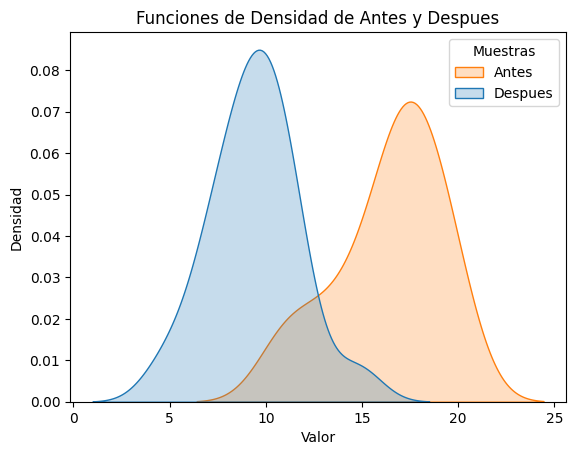

In [13]:
# Importamos una librería
import seaborn as sns

# Crear un DataFrame con las muestras
df = pd.DataFrame({'Antes': muestra1, 'Despues': muestra2})

# Graficar las funciones de densidad
sns.kdeplot(data=df, fill=True)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Funciones de Densidad de Antes y Despues')
plt.legend(title='Muestras', labels=['Antes', 'Despues'])
plt.show()

In [14]:
# Impactamos el Test de hipotesis
pg.ttest(x=df['Antes'], y=df['Despues'], alternative = 'less', paired = True, correction = False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-9.342217,19,less,7.783500e-09,"[-inf, -5.7]",2.803718,1.662e+06,1.0


In [15]:
# Imprimimos la conclusion
print("Podemos decir con un nivel de confianza del 95% que como el p-value es menor al 5% podemos rechazar la hipotesis nula y podemos considerar que el tiempo \
que una persona pasa en la aplicación tuvo una mejora")

Podemos decir con un nivel de confianza del 95% que como el p-value es menor al 5% podemos rechazar la hipotesis nula y podemos considerar que el tiempo que una persona pasa en la aplicación tuvo una mejora


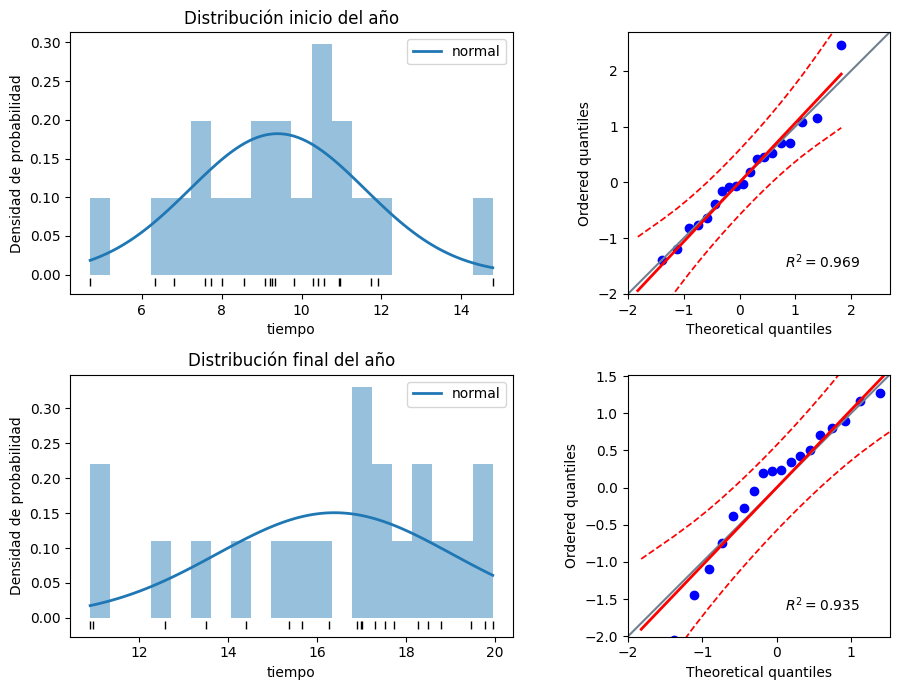

In [16]:
# Gráficos de distribución
# ==============================================================================
from scipy import stats
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

# Valores de la media (mu) y desviación típica (sigma)
mu, sigma = stats.norm.fit(df['Antes'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(df['Antes']), max(df['Antes']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico distribución
axs[0, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[0, 0].hist(x=df['Antes'], density=True, bins=20, color="#3182bd", alpha=0.5)
axs[0, 0].plot(df['Antes'], np.full_like(df['Antes'], -0.01), '|k', markeredgewidth=1)
axs[0, 0].set_title('Distribución inicio del año')
axs[0, 0].set_xlabel('tiempo')
axs[0, 0].set_ylabel('Densidad de probabilidad')
axs[0, 0].legend()

# Gráfico distribución qq-plot
pg.qqplot(df['Antes'], dist='norm', ax=axs[0, 1])

mu, sigma = stats.norm.fit(df['Despues'])
x_hat = np.linspace(min(df['Despues']), max(df['Despues']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[1, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[1, 0].hist(x=df['Despues'], density=True, bins=20, color="#3182bd", alpha=0.5)
axs[1, 0].plot(df['Despues'], np.full_like(df['Despues'], -0.01), '|k', markeredgewidth=1)
axs[1, 0].set_title('Distribución final del año')
axs[1, 0].set_xlabel('tiempo')
axs[1, 0].set_ylabel('Densidad de probabilidad')
axs[1, 0].legend()

pg.qqplot(df['Despues'], dist='norm', ax=axs[1, 1])
plt.tight_layout();

In [17]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=df['Antes'])

,W,pval,normal
Antes,0.982973,0.966477,True


In [18]:
pg.normality(data=df['Despues'])

,W,pval,normal
Despues,0.92292,0.112786,True


In [19]:
# Conclusiones de la normalidad
print("No existen evidencias para rechazar la hipotesis nula de normalidad, lo que si se evidencia es que el estadístico \
es mucho menor en la distribución de antes y eso se ve en la dispersión del gráfico de qqplot")

No existen evidencias para rechazar la hipotesis nula de normalidad, lo que si se evidencia es que el estadístico es mucho menor en la distribución de antes y eso se ve en la dispersión del gráfico de qqplot


## ANOVA Test

El análisis de varianzas es otra técnica para comprar las medias entre grupo. La idea intutiva es comprar las varianzas de las medias de los distintos grupos y ver que tan diferentes son. La hipótesis nula es que todas las observaciones parten de la misma población, por ende, sus medias y varianzas son iguales, por esto, la varianza entre grupos debería ser la misma.

En general, utilizamos este tipo de test cuando queremos analizar más de 2 muestras. Para análisis de hasta 2 muestreas tenemos los T-test.

¿Qué supuestos se tienen que cumplir para poder realizar este tipo de análisis?

* Independencia: Las observaciones (dentro de cada muestra) tienen que ser independientes y aleatorias. Lo mismo tiene que ocurrir entre los grupos. Debe darse la independencia entre grupos.
* Normalidad: Cada una de las muestras debe provenir de una población normal. Obviamente, por el teorema central del límite, mientras más grandes sean los grupos podemos ser más laxos con este requisitos pero siempre es recomendable analizar como se distribuyen los residuos de cada observación respecto a la media. Siempre hay que evitar tener datos extremos que invaliden estos supuestos.
* Homocedasticidad: La varianza de cada grupo tiene que ser aproximadamente la mismas. Dado que se supone que todas las observaciones provienen de la misma población, entonces todas tendran la misma media y varianza (hipótesis nula).

Este estadístico presenta muchas modificaciones dependendiendo o no se cumplan los supuestos que se describen. Se tomará una visión introductoria y posteriormente se analizará en detalle.

El estadísticos que se utiliza es el siguiente cuando tenemso dos grupos: 

$$
F = \frac{S_1^2/\sigma_1^2}{S_2^2/\sigma_2^2}
$$

Existen varios tipos de test de ANOVA pero la división más generica es si existen teste ANOVA de 1 vía (1 factor) o de 2 vías (2 factores). La diferencia entre ambos son la cantidad de variables independientes que queremos incluir en el modelo para testear una variable dependiente. EL test de 1 vía cuando la cantidad de grupos en análisis son 2 es igual a un T-test.

#### Descomposición de la varianza

El estadísicto anova intenta realizar el análisi de la variabilidad al descomponer la variabilidad total en: La variabilidad dentro del grupo (intra) + la variabilidad entre grupos (inter)

$$
F_{ratio}  = \frac{Cuadrados \ Medios \ del \ Factor}{Cuadrados \ Medios \ del \ Error} = \frac{\hat{S}_t^2}{\hat{S}_E^2} = \frac{intervarianza}{intravarianza} \sim F_{k-1,N-k}
$$

#### ¿Por qué se hace un test de anova y no un two sample T-test para cada combinación?

Esto es porque en realidad cuando hacemos multiples T-Test con un intervalo de confianza del 95% lo que estamos diciendo es que para cada uno de esos ensayos tendremos un 95% de confianza. Por ende, el resultado global del análisis para el caso de tener que hacer 3 pruebas T-Test tendrá un nivel de confianza de 0.95^3 (si es que todos los grupos son independientes).

#### Ejemplo ANOVA test

Una empresa de contenido audiovisual quiere comparar las medias de visualizaciones dentro de las próximas 24 horas de 3 estrenos distintos (3 generos distintos). La intención es comprar si existe una diferencia en la visualización promedio de cada una de estas muestras. Para esto se recolectaron 3 muestras (una para cada genero) randomizadas e independientes.

**Ho: d1.mean() = d2.mean() = d3.mean() = &mu;** \
**Ha: Al menos uno de los grupos no presenta la misma media**

In [20]:
# Creamos los trees grupos de forma aleatoria
# ==============================================================================

# Definir el tamaño de las muestras
tamano_muestra1 = 20
tamano_muestra2 = 20
tamano_muestra3 = 20

# Definir las medias y desviaciones estándar deseadas
media_muestra1 = 50.65
desvio_std_muestra1 = np.sqrt(23.187)
media_muestra2 = 49.15
desvio_std_muestra2 = np.sqrt(24.239)
media_muestra3 = 39.9
desvio_std_muestra3 = np.sqrt(17.147)

# Generar las muestras con las medias y desviaciones estándar especificadas
muestra1 = np.random.normal(media_muestra1, desvio_std_muestra1, size=tamano_muestra1)
muestra2 = np.random.normal(media_muestra2, desvio_std_muestra2, size=tamano_muestra2)
muestra3 = np.random.normal(media_muestra3, desvio_std_muestra3, size=tamano_muestra3)

print(muestra1)
print("\n")
print(muestra2)
print("\n")
print(muestra3)

[52.54048884 45.84895989 52.1159519  57.11074194 51.77080511 53.56311827
 49.87207515 45.90984196 57.29741615 47.9131038  44.60780477 46.03678049
 46.89765086 46.33106822 51.33366484 46.98773467 49.19960144 56.61484372
 44.21833569 51.43547594]


[51.02777683 55.87038258 50.83851716 44.1237691  50.74099761 47.49278341
 49.76716072 47.74469587 43.5828885  45.64461908 40.31657632 50.38103977
 52.90698943 45.88465435 51.79548959 45.42327438 51.51499041 42.14361479
 53.21255889 41.71337009]


[45.07618685 38.59931621 42.27609835 44.56709177 40.66453466 45.8677795
 40.88819943 42.07497996 39.74017091 33.30742206 41.45333527 38.21210286
 38.43030756 40.02974039 46.67136523 42.98229648 39.01419202 44.25785781
 43.69830914 35.06356464]


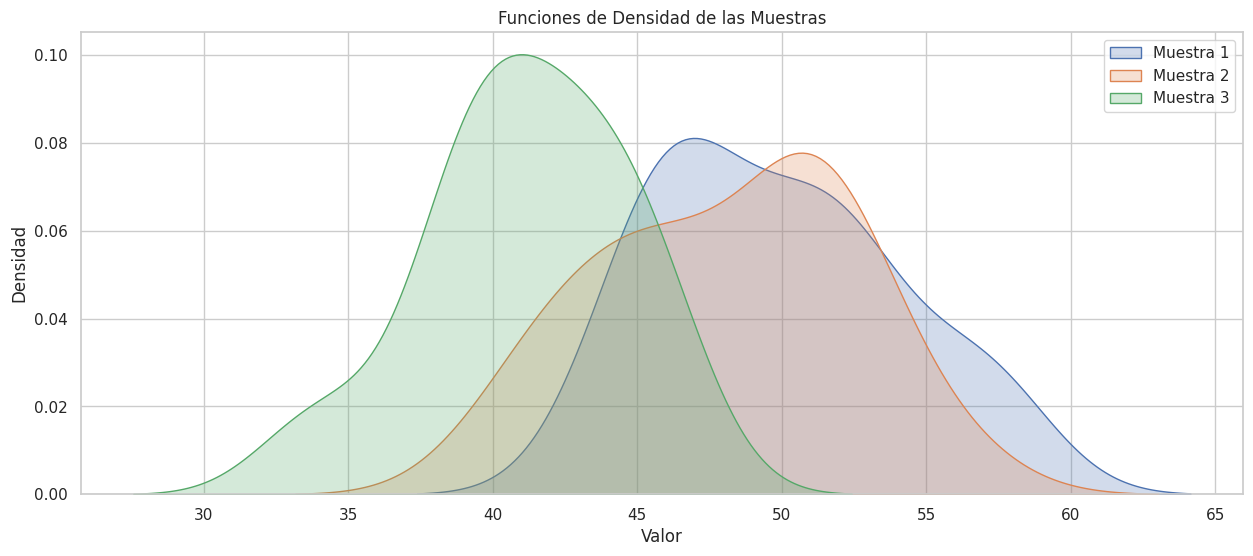

In [21]:
# Graficar las funciones de densidad
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))

sns.kdeplot(muestra1, label='Muestra 1', fill=True)
sns.kdeplot(muestra2, label='Muestra 2', fill=True)
sns.kdeplot(muestra3, label='Muestra 3', fill=True)

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Funciones de Densidad de las Muestras')
plt.legend()

plt.show()

In [22]:
# Ahora preparamos la data para poder hacer el ANOVA
df_muestras = pd.DataFrame({
    'Muestra 1': muestra1,
    'Muestra 2': muestra2,
    'Muestra 3': muestra3
})

# Aplicamos la función melt
df_muestras_melted = df_muestras.melt(var_name='Muestra', value_name='Valor')
df_muestras_melted.head(5)

,Muestra,Valor
0,Muestra 1,52.540489
1,Muestra 1,45.848960
2,Muestra 1,52.115952
3,Muestra 1,57.110742
4,Muestra 1,51.770805


In [23]:
# Test ANOVA de una vía (One-way ANOVA)
# ==============================================================================
pg.anova(data=df_muestras_melted, dv='Valor', between='Muestra', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Muestra,853.008211,2,426.504105,26.55132,7.099014e-09,0.482301
1,Within,915.613013,57,16.063386,NaN,NaN,NaN


In [24]:
# También podemos calcular el p-value de esto como...
alpha = 0.05

gl_n = 2 # Grados de libertad del numerador (grupos -1)
gl_d = 57 # Grados de libertad del denominador (smaple-grupos)

# Si quiero saber cual es el valor crítico para alpha 
f_critical = st.f.ppf(1-alpha, gl_n, gl_d)
print(f"El valor crítico para alpha es: {f_critical}")

p_value = 1 - st.f.cdf(f_critical, gl_n, gl_d)
print(f"Se comprueba la probabilidad acumulada: {p_value}")

# Calculamos el p-value del estadístico que obtuve
f_statistic = pg.anova(data=df_muestras_melted, dv='Valor', between='Muestra', detailed=True)['F'][0]
p_value = 1 - st.f.cdf(f_statistic, gl_n, gl_d)
print(f"Se comprueba la probabilidad acumulada: {p_value}")

El valor crítico para alpha es: 3.1588427192606465
Se comprueba la probabilidad acumulada: 0.050000000000000044
Se comprueba la probabilidad acumulada: 7.099014043276952e-09


In [25]:
print("Como el p-value es muy inferior al 5% de margen de error podemos ver que existen evidencias para rechazar la hipótesis nula de que todas las muestras presentan la misma media")

Como el p-value es muy inferior al 5% de margen de error podemos ver que existen evidencias para rechazar la hipótesis nula de que todas las muestras presentan la misma media


#### ¿Cómo podemos calcular esto de forma manual?

In [26]:
total_mean = df_muestras_melted['Valor'].mean()
total_mean

46.37677439399594

In [27]:
# AHora lo que hacemos es calcular la suma de los cuadrados de las distancias a la media general
df_muestras_melted_2 = df_muestras_melted.copy()
df_muestras_melted_2['distance_total_mean'] = df_muestras_melted_2['Valor'] - total_mean
df_muestras_melted_2['distance_total_mean_square'] = df_muestras_melted_2['distance_total_mean']**2

# calculamos total sum of squares
TSS = df_muestras_melted_2['distance_total_mean_square'].sum()
TSS

1768.6212241462663

In [28]:
# Ahora calculamos la media de cada uno de los grupos
total_mean_1 = df_muestras_melted.loc[df_muestras_melted['Muestra'] == 'Muestra 1', 'Valor'].mean()
total_mean_2 = df_muestras_melted.loc[df_muestras_melted['Muestra'] == 'Muestra 2', 'Valor'].mean()
total_mean_3 = df_muestras_melted.loc[df_muestras_melted['Muestra'] == 'Muestra 3', 'Valor'].mean()
print(total_mean_1)
print(total_mean_2)
print(total_mean_3)

49.88027318201149
48.10630744391737
41.14374255605896


In [29]:
# Lo primero que hacemos es calcular la distancia de cada valor con la media de su grupo de pertenencia
df_muestras_melted_2['distance_group_mean'] = np.where(df_muestras_melted_2['Muestra'] == 'Muestra 1', df_muestras_melted_2['Valor'] - total_mean_1,
                                                      np.where(df_muestras_melted_2['Muestra'] == 'Muestra 2', df_muestras_melted_2['Valor'] - total_mean_2,
                                                      df_muestras_melted_2['Valor'] - total_mean_3))
df_muestras_melted_2.tail(5)

,Muestra,Valor,distance_total_mean,distance_total_mean_square,distance_group_mean
55,Muestra 3,42.982296,-3.394478,11.522480,1.838554
56,Muestra 3,39.014192,-7.362582,54.207619,-2.129551
57,Muestra 3,44.257858,-2.118917,4.489807,3.114115
58,Muestra 3,43.698309,-2.678465,7.174176,2.554567
59,Muestra 3,35.063565,-11.313210,127.988715,-6.080178


In [30]:
# AHora lo que hacemos es calcular la suma de los cuadrados dentro de cada grupo o sum of squares errors (SSE)
df_muestras_melted_2['distance_group_mean_square'] = df_muestras_melted_2['distance_group_mean']**2

# Calculamos el SSE
SSE = df_muestras_melted_2['distance_group_mean_square'].sum()
SSE

915.6130132410829

In [31]:
# AHora calculamos la SST (que es el desvío de cada grupo respecto al total ponderado por las observaciones)
SST = tamano_muestra1 * (total_mean_1 - total_mean)** 2 + tamano_muestra2 * (total_mean_2 - total_mean)** 2 + tamano_muestra3 * (total_mean_3 - total_mean)** 2
SST

853.0082109051813

In [32]:
# Ahora lo que hacemos es calcular el estadístico
dof_SSE = 60-3
dof_SST = 3-1
MS_intragroup =  SSE / 57
MS_beetweengroup =  SST / dof_SST
F_statistic = MS_beetweengroup / MS_intragroup
print(F_statistic)

# Ahora lo que hacemos es calcular el p-value del estadístico
print(1-st.f.cdf(F_statistic, dof_SST, dof_SSE))

# Imprimimos también el F crítico
print(st.f.ppf(0.05, dof_SST, dof_SSE))

26.551319890859393
7.099014043276952e-09
0.05133948002183921


## Análisis de normalidad

Para el anaĺisis de normalidad tenemos el estadístico de jarque bera como también el de shapiro-wilk. Ambos plantean en la hipotesis nula que la muestra de de datos proviene de una distribución normal. El primero método es un método análitico que se base en la asimetría y kurtosis para crear un estadístico. No obstante, es importante remarcar que a medida que el tamño de la muestra los métodos parámetros (estos test de hipótesis) se vuelven menos sensibles a la falta de normalidad y, por el contrario, como lo que estamos viendo es una mirada frecuentista al utilizar p-values, los test de normalidad tienen más chances de rechzar la hipótesis nula puesto que crece el poder del estadístico.

Es importante tener en cuenta métodos gráficos y el tamaño de la muestra para evaluar bien esto.

In [33]:
# Test de normalidad Shapiro-Wilk
pg.normality(data=df['Antes'])

,W,pval,normal
Antes,0.982973,0.966477,True


In [34]:
# Test de normalidad Shapiro-Wilk
pg.normality(data=df['Despues'])

,W,pval,normal
Despues,0.92292,0.112786,True


## Análisis de homocedasticidad

Para mejorar la interpretación de esto es importante tener en cuenta que tipo de análisis estamos haciendo. Cuando estamos analizando distintas muestras queremos evaluar si la varianza es constante entre las distintas muestras (es decir que es homocedastica) y en un modelo de regresión por ejemplo queremos ver que la varianza de los errores se mantenga constante en cada una de las predicciones. En este útimo caso, se puede hacer aplicando un modelo de regresión sobre los errores del modelo y verificar si los betas de las variables independientes son significativos. Si lo son (con un T-test por ejemplo) tenemos una varianza que no es constante sino que tiene un proyección lineal. (Para esto se utilizan los estadísticos de breusch-pagan o test de white)

Generalmente, los test de hipótesis plantean como hipótesis nula la homocedasticidad entre grupos.

En los métodos gráficos (como en un boxplot) lo que queremos encontrar son datos outliers que puedan entorpecer el análisis pero lo que nos interesa es el tamaño de las cajas (el rango intercuantilico) dado que si tenemos cajas con distintos tamaños podemos tener evidencias de que las varianzas poblacionales son distintas.

In [35]:
# Para el ejemplo práctico vamos a ir por el último caso que teníamos varios grupos
df_muestras_melted.head(5)

,Muestra,Valor
0,Muestra 1,52.540489
1,Muestra 1,45.848960
2,Muestra 1,52.115952
3,Muestra 1,57.110742
4,Muestra 1,51.770805


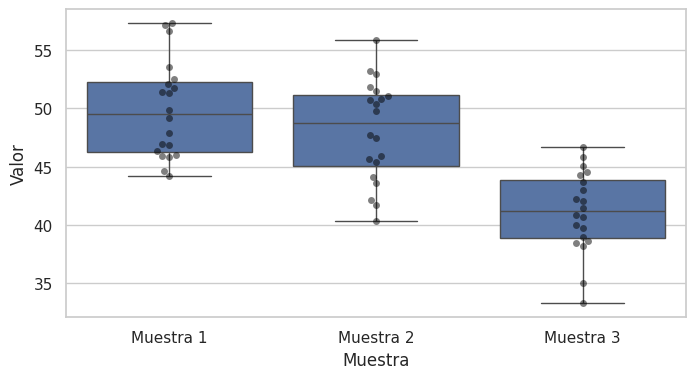

In [36]:
# Con este tipo de gráficos estamos viendo de forma visual la varianza de cada grupo
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="Muestra", y="Valor", data=df_muestras_melted, ax=ax)
sns.swarmplot(x="Muestra", y="Valor", data=df_muestras_melted, color='black', alpha = 0.5, ax=ax);

In [38]:
# Test de homocedasticidad
# En este caso estamos viendo si la varianza entre grupos es igual para ver si vienen de la misma distribución (normal) poblacional
# ==============================================================================
pg.homoscedasticity(data=df_muestras_melted, dv='Valor', group='Muestra', method='levene')

,W,pval,equal_var
levene,1.095465,0.341319,True
